In [1]:
# Import necessary libraries
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# Path to the NetCDF file
file_path = "data/src/ClimateNet/data-2012-06-18-01-1_0.nc"  # Replace 'example.nc' with your actual file name

# Open the NetCDF file
ds = xr.open_dataset(file_path, engine="netcdf4")

In [3]:
ds

<xarray.Dataset> Size: 64MB
Dimensions:  (lat: 768, lon: 1152, time: 1)
Coordinates:
  * lat      (lat) float64 6kB -90.0 -89.77 -89.53 -89.3 ... 89.53 89.77 90.0
  * lon      (lon) float64 9kB 0.0 0.3125 0.625 0.9375 ... 359.1 359.4 359.7
  * time     (time) <U23 92B 'data-2012-06-18-01-1.nc'
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 4MB ...
    U850     (time, lat, lon) float32 4MB ...
    V850     (time, lat, lon) float32 4MB ...
    UBOT     (time, lat, lon) float32 4MB ...
    VBOT     (time, lat, lon) float32 4MB ...
    QREFHT   (time, lat, lon) float32 4MB ...
    ...       ...
    TS       (time, lat, lon) float32 4MB ...
    TREFHT   (time, lat, lon) float32 4MB ...
    Z1000    (time, lat, lon) float32 4MB ...
    Z200     (time, lat, lon) float32 4MB ...
    ZBOT     (time, lat, lon) float32 4MB ...
    LABELS   (lat, lon) int64 7MB ...

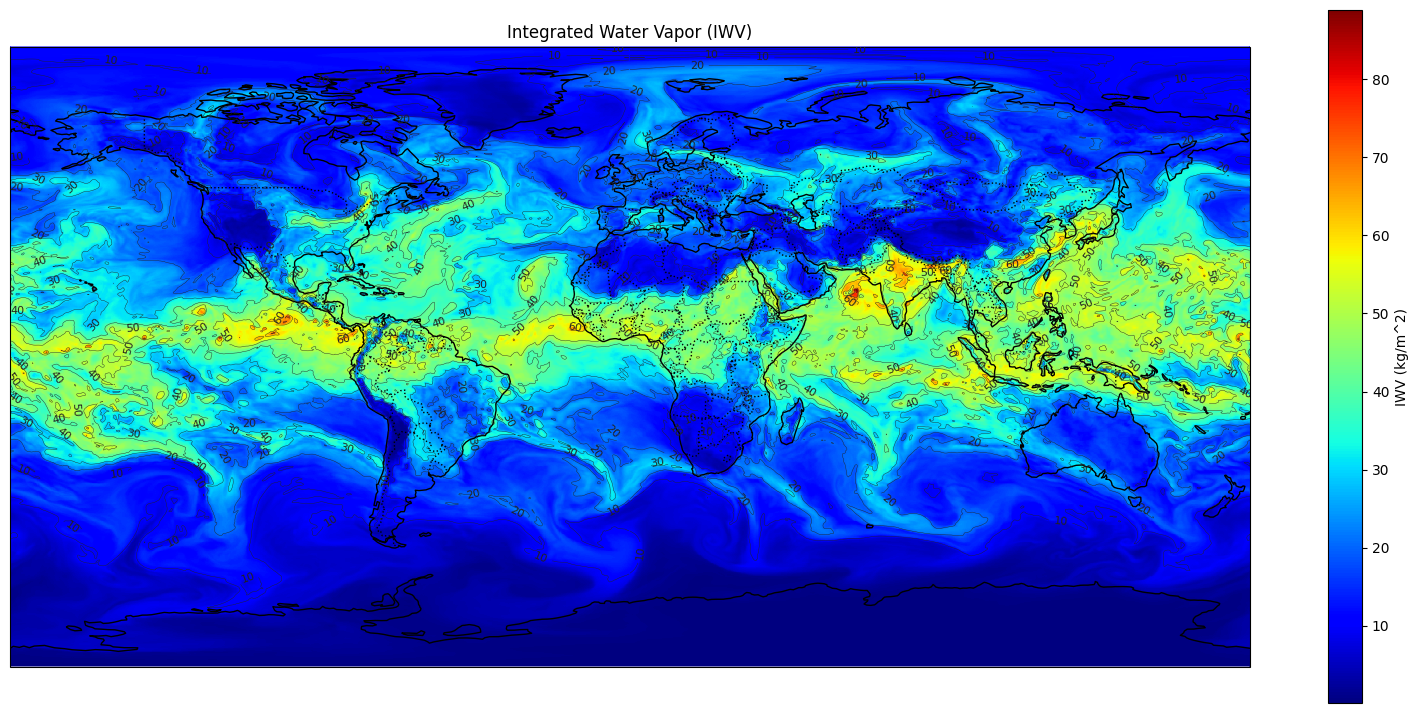

In [ ]:
# Extract IWV and labels
iwv = ds['TMQ']  # Replace 'IWV' with the actual variable name for Integrated Water Vapor in your file
labels = ds['LABELS']  # Replace 'labels' with the actual variable name for labels in your file

# Plot IWV
plt.figure(figsize=(20, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
iwv.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet', cbar_kwargs={'label': 'IWV (kg/m^2)'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Integrated Water Vapor (IWV)')

# Add contour lines every 10 units
contour_levels = np.arange(iwv.min(), iwv.max(), 10)
contours = plt.contour(iwv.lon, iwv.lat, iwv.squeeze(), levels=contour_levels, colors='#222222', linewidths=0.3, transform=ccrs.PlateCarree())
plt.clabel(contours, inline=True, fontsize=8, fmt='%d') 

plt.show()

In [ ]:
# Extract IWV and labels
iwv = ds['TMQ']  # Replace 'IWV' with the actual variable name for Integrated Water Vapor in your file
labels = ds['LABELS']  # Replace 'labels' with the actual variable name for labels in your file

# Plot IWV
plt.figure(figsize=(20, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
iwv.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet', cbar_kwargs={'label': 'IWV (kg/m^2)'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Integrated Water Vapor (IWV)')

# Add contour lines every 10 units
contour_levels = np.arange(iwv.min(), iwv.max(), 10)
contours = plt.contour(iwv.lon, iwv.lat, iwv.squeeze(), levels=contour_levels, colors='#222222', linewidths=0.3, transform=ccrs.PlateCarree())
plt.clabel(contours, inline=True, fontsize=8, fmt='%d')  # Добавляет подписи к изолиниям

plt.show()

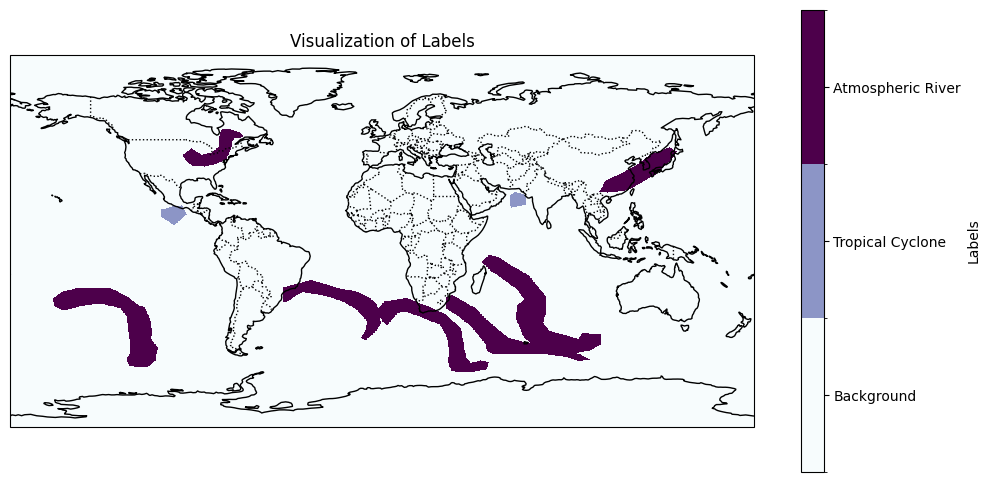

In [17]:
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# Find unique values in the labels
unique_labels = np.unique(labels.values)
unique_labels = unique_labels[~np.isnan(unique_labels)]  # Remove NaN if present

# Create a custom colormap with colors only for existing labels
colors = plt.cm.BuPu(np.linspace(0, 1, len(unique_labels)))
cmap = ListedColormap(colors)

# Create boundaries and norm
bounds = list(range(int(min(unique_labels)), int(max(unique_labels))+2))
norm = BoundaryNorm(bounds, cmap.N)

# Plot labels with custom colormap
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
labels.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm,
            cbar_kwargs={'label': 'Labels', 'ticks': [b + 0.5 for b in bounds[:-1]], 
                         'boundaries': bounds, 'spacing': 'proportional'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Visualization of Labels')

# Add a custom colorbar legend with appropriate labels
label_descriptions = {0: 'Background', 1: 'Tropical Cyclone', 2: 'Atmospheric River'}
cbar = plt.gcf().axes[-1]  # Get the colorbar
cbar.set_yticklabels([label_descriptions[i] for i in unique_labels])

plt.show()
